<a href="https://colab.research.google.com/github/kayeneii/AISOC-Tutorials/blob/main/AISOC_Vector_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Vector Embeddings by Zion Pibowei

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings("ignore")

In [51]:
#to fetch dataframe uploaded to this ipynb
df=pd.read_csv ("SpotifyFeatures.csv")
df_subset=df.sample(2000, random_state=42)

In [ ]:
#to fetch metadata of data file and identify missing values
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
len(df)

232725

In [ ]:
df_subset.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
788,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850
207109,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487
138644,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870
37164,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700
174351,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850


In [ ]:
df_subset.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [48]:
feature_cols = [
    'popularity','acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence'
    ]

In [53]:
X=df_subset[feature_cols].values
df_subset[feature_cols]

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
788,45,0.00192,0.327,194107,0.8350,0.000150,0.1670,-4.952,0.0609,171.795,0.3850
207109,25,0.93200,0.253,102920,0.0798,0.568000,0.0906,-18.512,0.0439,110.931,0.0487
138644,19,0.03310,0.821,225437,0.7370,0.013400,0.1320,-6.295,0.2120,137.968,0.7870
37164,29,0.00428,0.745,225400,0.7720,0.114000,0.0722,-3.949,0.0904,133.113,0.1700
174351,17,0.96500,0.502,287973,0.8040,0.000096,0.9020,-9.935,0.8070,104.576,0.1850
...,...,...,...,...,...,...,...,...,...,...,...
155335,54,0.01230,0.523,137840,0.5100,0.000084,0.1080,-9.827,0.0514,120.432,0.7890
710,42,0.09600,0.589,209440,0.6140,0.001550,0.1160,-5.108,0.0270,106.104,0.1110
205632,25,0.77500,0.355,471600,0.3460,0.461000,0.2790,-14.760,0.0447,125.319,0.2190
122187,51,0.08870,0.863,172225,0.4090,0.028100,0.3590,-8.550,0.3210,130.011,0.2000


In [52]:
#Apply t-SNE to reduce to 2D
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_2d = tsne.fit_transform(X)

print(f"Fitted tSNE algorithm to 200 samples of the data in {time.time()-start_time} seconds")

Fitted tSNE algorithm to 200 samples of the data in 265.674852848053 seconds


In [54]:
#Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
start_time = time.time()
X_2d = tsne.fit_transform(X)

print(f"Fitted tSNE algorithm to 2000 samples of the data in {time.time()-start_time} seconds")

Fitted tSNE algorithm to 2000 samples of the data in 16.102899312973022 seconds


In [55]:
X_2d

array([[-22.72776 ,  -8.542324],
       [-63.219627,  -6.960914],
       [  5.98236 , -33.385258],
       ...,
       [ 67.24568 ,  13.928068],
       [-29.247465,  33.10402 ],
       [-27.26758 ,  34.46709 ]], dtype=float32)

In [56]:
#Add the 2D coordinates back to the dataframe
df_subset['x'] = X_2d[:, 0]
df_subset['y'] = X_2d[:, 1]

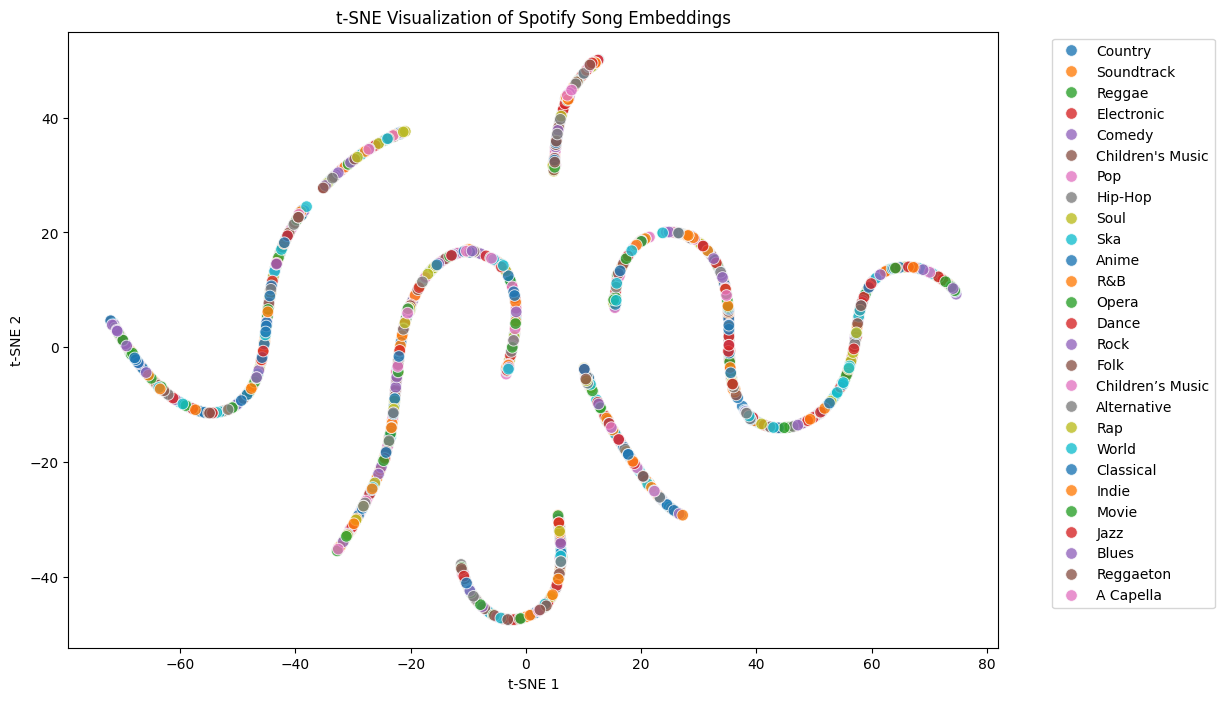

In [57]:
# Plot with color based on genre
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_subset, x='x', y='y', hue='genre', palette='tab10', s=70, alpha=0.8)
plt.title("t-SNE Visualization of Spotify Song Embeddings")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()